In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

In [2]:
iris = load_iris()

# Exploring Data

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Convert datatype to float
df = df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# append "target" and name it "label"
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Preparing data for Keras and TensorFlow

In [7]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [8]:
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [10]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [11]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Model Subclassing

In [12]:
class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
        

my_custom_model = CustomModel(name='my_custom_model')

# Training a Model Subclassing model

In [13]:
my_custom_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = my_custom_model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 1s 236ms/step - loss: 2.5031 - accuracy: 0.3596 - val_loss: 2.4575 - val_accuracy: 0.2174
Epoch 2/30
2/2 [==============================] - 0s 52ms/step - loss: 2.3407 - accuracy: 0.3596 - val_loss: 2.3461 - val_accuracy: 0.2174
Epoch 3/30
2/2 [==============================] - 0s 38ms/step - loss: 2.2291 - accuracy: 0.3596 - val_loss: 2.2596 - val_accuracy: 0.2174
Epoch 4/30
2/2 [==============================] - 0s 29ms/step - loss: 2.1402 - accuracy: 0.3596 - val_loss: 2.1838 - val_accuracy: 0.2174
Epoch 5/30
2/2 [==============================] - 0s 36ms/step - loss: 2.0671 - accuracy: 0.3596 - val_loss: 2.1237 - val_accuracy: 0.2174
Epoch 6/30
2/2 [==============================] - 0s 43ms/step - loss: 2.0054 - accuracy: 0.3596 - val_loss: 2.0651 - val_accuracy: 0.2174
Epoch 7/30
2/2 [==============================] - 0s 28ms/step - loss: 1.9434 - accuracy: 0.3596 - val_loss: 2.0072 - val_accuracy: 0.2174
Epoch 8/30
2/2 [==========

In [14]:
my_custom_model.summary()

Model: "my_custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  25        
_________________________________________________________________
dense_1 (Dense)              multiple                  60        
_________________________________________________________________
dense_2 (Dense)              multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [15]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

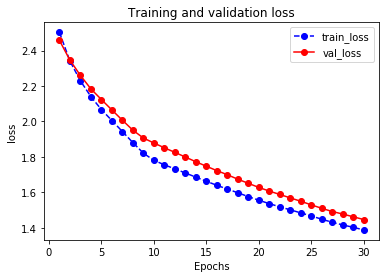

In [16]:
plot_metric(history, 'loss')

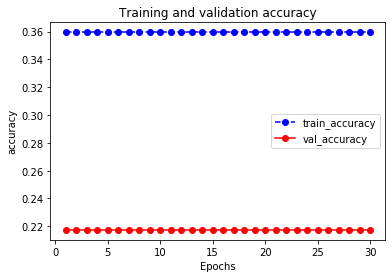

In [17]:
plot_metric(history, 'accuracy')

In [18]:
my_custom_model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 4ms/step - loss: 1.3392 - accuracy: 0.3421


[1.339196801185608, 0.34210526943206787]